# Importing the libraries.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Read the DataFrame.

In [2]:
df = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

# Get the the head of the DataFrame.

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Get info about DataFrame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Data visualization.

In [5]:
df["gender"] = df["gender"].map({"Female":"F", "Male":"M", "Other":"Other"})

In [6]:
df["gender"] = df["gender"].map({"F":"F", "M":"M", "Other":df["gender"].mode()[0]})

<AxesSubplot:xlabel='diabetes', ylabel='count'>

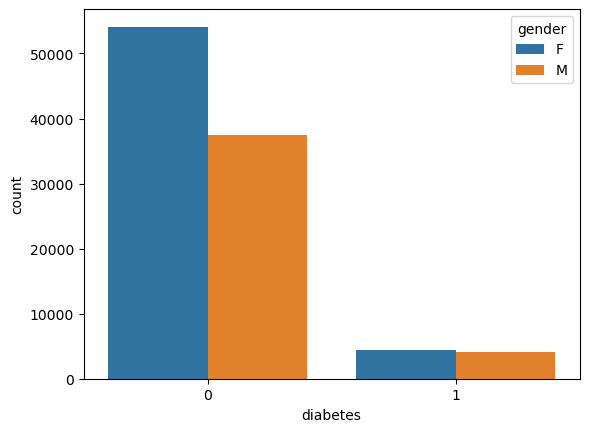

In [7]:
sns.countplot(x = df["diabetes"], hue=df["gender"])

<AxesSubplot:xlabel='diabetes', ylabel='count'>

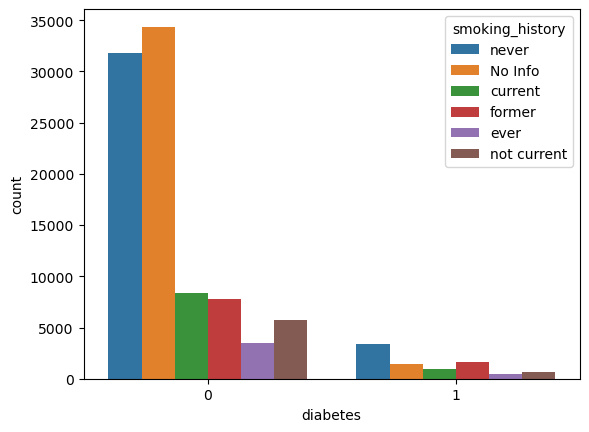

In [8]:
sns.countplot(x = df["diabetes"], hue=df["smoking_history"])

# Convert object values to int.

In [9]:
target = []
for i in df.columns:
    col = df[i]
    if type(col[0]) == str:
        target.append(i)
target

['gender', 'smoking_history']

In [10]:
from sklearn.preprocessing import LabelEncoder

for i in target:
    encoder = LabelEncoder()
    encoder.fit(list(df[i]))
    df[i] = encoder.fit_transform(df[i])

# Features extracting.

In [11]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [12]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df["diabetes"]

# Data splitting.

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=101)

# KNN.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

## Get prediction of KNN.

In [15]:
y_predKNN = KNN.predict(x_test)

## Get accuracy of KNN.

In [16]:
from sklearn.metrics import accuracy_score

accKNN = accuracy_score(y_test, y_predKNN)
accKNN

0.95235

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(max_depth=10).fit(x_train, y_train)

## Get prediction of DT.

In [18]:
y_predTree = Tree.predict(x_test)

## Get accuracy of DT.

In [19]:
accTree = accuracy_score(y_test, y_predTree)
accTree

0.97035

# Random Forest.

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=10).fit(x_train, y_train)

## Get prediction of RF.

In [21]:
y_predRF = RF.predict(x_test)

## Get accuracy of RF.

In [22]:
accRF = accuracy_score(y_test, y_predRF)
accRF

0.97125

# Logistic Regression.

In [23]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Get prediction of LR.

In [24]:
y_predLR = LR.predict(x_test)

## Get accuracy of LR.

In [25]:
accLR = accuracy_score(y_test, y_predLR)
accLR

0.95075

# All models accuracy.

In [26]:
allacc = pd.DataFrame(columns=["Accuracy"], index=["KNN", "Random Forest",
                                                  "Decision Tree", "Logistic Regression"])
models = {'KNN' : KNN, 'Random Forest' : RF, 'Decision Tree' : Tree, "Logistic Regression" : LR}

for name, model in models.items() :
  allacc.loc[name, 'Accuracy'] = accuracy_score(y_test, y_pred = model.predict(x_test))

In [27]:
allacc

,Accuracy
KNN,0.95235
Random Forest,0.97125
Decision Tree,0.97035
Logistic Regression,0.95075


<AxesSubplot:title={'center':'Final models accuracy'}>

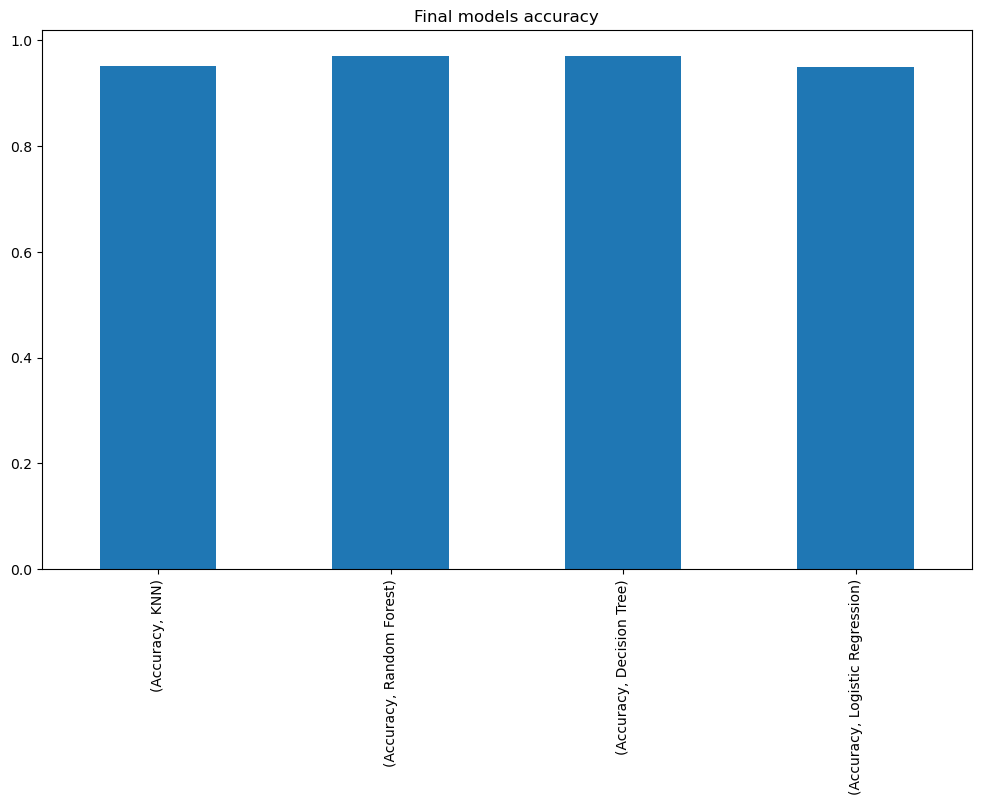

In [28]:
allacc.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Final models accuracy')